In [1]:
import pandas as pd

# 创建一个空的DataFrame来存储所有年份的数据
all_names = pd.DataFrame()

# 遍历每一年
for year in range(1880, 2011):
    # 读取该年份的数据
    path = f'datasets/babynames/yob{year}.txt'
    names = pd.read_csv(path, names=['name', 'sex', 'births'])
    
    # 添加一个表示年份的列
    names['year'] = year
    
    # 将该年份的数据添加到all_names中
    all_names = pd.concat([all_names, names], ignore_index=True)

# 根据年份和性别对数据进行分组，然后计算每一组的出生总数
total_births = all_names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

# 添加一个表示总体出生数的列
total_births['total'] = total_births['F'] + total_births['M']

total_births

sex,F,M,total
year,,,
1880,90993,110493,201486
1881,91955,100748,192703
1882,107851,113687,221538
1883,112322,104632,216954
1884,129021,114445,243466
...,...,...,...
2006,1896468,2050234,3946702
2007,1916888,2069242,3986130
2008,1883645,2032310,3915955


In [12]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 将索引转换为DatetimeIndex，并提供频率信息
total_births.index = pd.date_range(start='1880', end='2010', freq='AS')

# 使用1880年到1980年的数据进行训练
train = total_births.loc['1880':'1980']

# 对总出生人口进行预测
model = ARIMA(train['total'], order=(5,1,0))
model_fit = model.fit()
forecast_total = model_fit.forecast(steps=30)
print('Total Forecast: ', forecast_total)

Total Forecast:  1981-01-01    3.480993e+06
1982-01-01    3.526446e+06
1983-01-01    3.568241e+06
1984-01-01    3.617116e+06
1985-01-01    3.658138e+06
1986-01-01    3.683757e+06
1987-01-01    3.706214e+06
1988-01-01    3.728086e+06
1989-01-01    3.748233e+06
1990-01-01    3.764893e+06
1991-01-01    3.777777e+06
1992-01-01    3.788867e+06
1993-01-01    3.798967e+06
1994-01-01    3.807795e+06
1995-01-01    3.815159e+06
1996-01-01    3.821257e+06
1997-01-01    3.826509e+06
1998-01-01    3.831117e+06
1999-01-01    3.835081e+06
2000-01-01    3.838428e+06
2001-01-01    3.841262e+06
2002-01-01    3.843698e+06
2003-01-01    3.845802e+06
2004-01-01    3.847604e+06
2005-01-01    3.849137e+06
2006-01-01    3.850444e+06
2007-01-01    3.851565e+06
2008-01-01    3.852528e+06
2009-01-01    3.853351e+06
2010-01-01    3.854054e+06
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [13]:
# 对男性出生人口进行预测
model = ARIMA(train['M'], order=(5,1,0))
model_fit = model.fit()
forecast_male = model_fit.forecast(steps=30)
print('Male Forecast: ', forecast_male)

Male Forecast:  1981-01-01    1.803286e+06
1982-01-01    1.826484e+06
1983-01-01    1.848413e+06
1984-01-01    1.873279e+06
1985-01-01    1.894010e+06
1986-01-01    1.907134e+06
1987-01-01    1.918518e+06
1988-01-01    1.929540e+06
1989-01-01    1.939541e+06
1990-01-01    1.947749e+06
1991-01-01    1.954138e+06
1992-01-01    1.959614e+06
1993-01-01    1.964548e+06
1994-01-01    1.968816e+06
1995-01-01    1.972361e+06
1996-01-01    1.975298e+06
1997-01-01    1.977815e+06
1998-01-01    1.980002e+06
1999-01-01    1.981871e+06
2000-01-01    1.983441e+06
2001-01-01    1.984767e+06
2002-01-01    1.985901e+06
2003-01-01    1.986873e+06
2004-01-01    1.987701e+06
2005-01-01    1.988401e+06
2006-01-01    1.988996e+06
2007-01-01    1.989503e+06
2008-01-01    1.989936e+06
2009-01-01    1.990304e+06
2010-01-01    1.990616e+06
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [14]:
# 对女性出生人口进行预测
model = ARIMA(train['F'], order=(5,1,0))
model_fit = model.fit()
forecast_female = model_fit.forecast(steps=30)
print('Female Forecast: ', forecast_female)

Female Forecast:  1981-01-01    1.678116e+06
1982-01-01    1.700234e+06
1983-01-01    1.719770e+06
1984-01-01    1.743676e+06
1985-01-01    1.763811e+06
1986-01-01    1.776219e+06
1987-01-01    1.787144e+06
1988-01-01    1.797769e+06
1989-01-01    1.807769e+06
1990-01-01    1.816104e+06
1991-01-01    1.822477e+06
1992-01-01    1.827963e+06
1993-01-01    1.833003e+06
1994-01-01    1.837461e+06
1995-01-01    1.841196e+06
1996-01-01    1.844275e+06
1997-01-01    1.846931e+06
1998-01-01    1.849280e+06
1999-01-01    1.851317e+06
2000-01-01    1.853042e+06
2001-01-01    1.854501e+06
2002-01-01    1.855760e+06
2003-01-01    1.856855e+06
2004-01-01    1.857797e+06
2005-01-01    1.858601e+06
2006-01-01    1.859287e+06
2007-01-01    1.859879e+06
2008-01-01    1.860389e+06
2009-01-01    1.860828e+06
2010-01-01    1.861203e+06
Freq: AS-JAN, Name: predicted_mean, dtype: float64


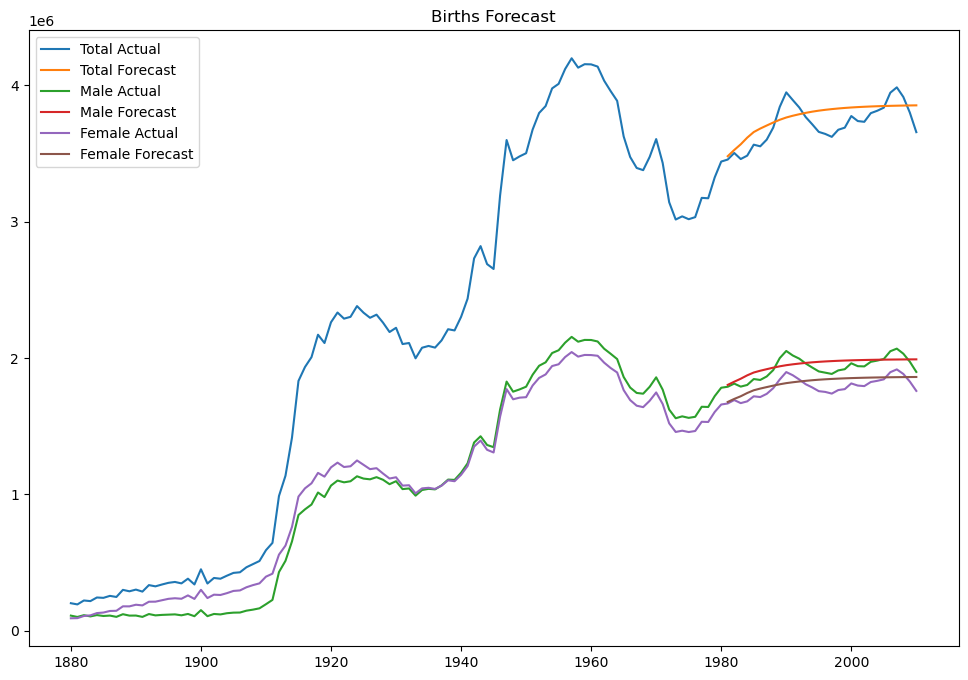

In [15]:
# 在同一张图中绘制预测结果与真实值的对比图
plt.figure(figsize=(12,8))
plt.plot(total_births.index, total_births['total'], label='Total Actual')
plt.plot(pd.date_range(start='1981', end='2010', freq='AS'), forecast_total, label='Total Forecast')
plt.plot(total_births.index, total_births['M'], label='Male Actual')
plt.plot(pd.date_range(start='1981', end='2010', freq='AS'), forecast_male, label='Male Forecast')
plt.plot(total_births.index, total_births['F'], label='Female Actual')
plt.plot(pd.date_range(start='1981', end='2010', freq='AS'), forecast_female, label='Female Forecast')
plt.legend()
plt.title('Births Forecast')
plt.show()

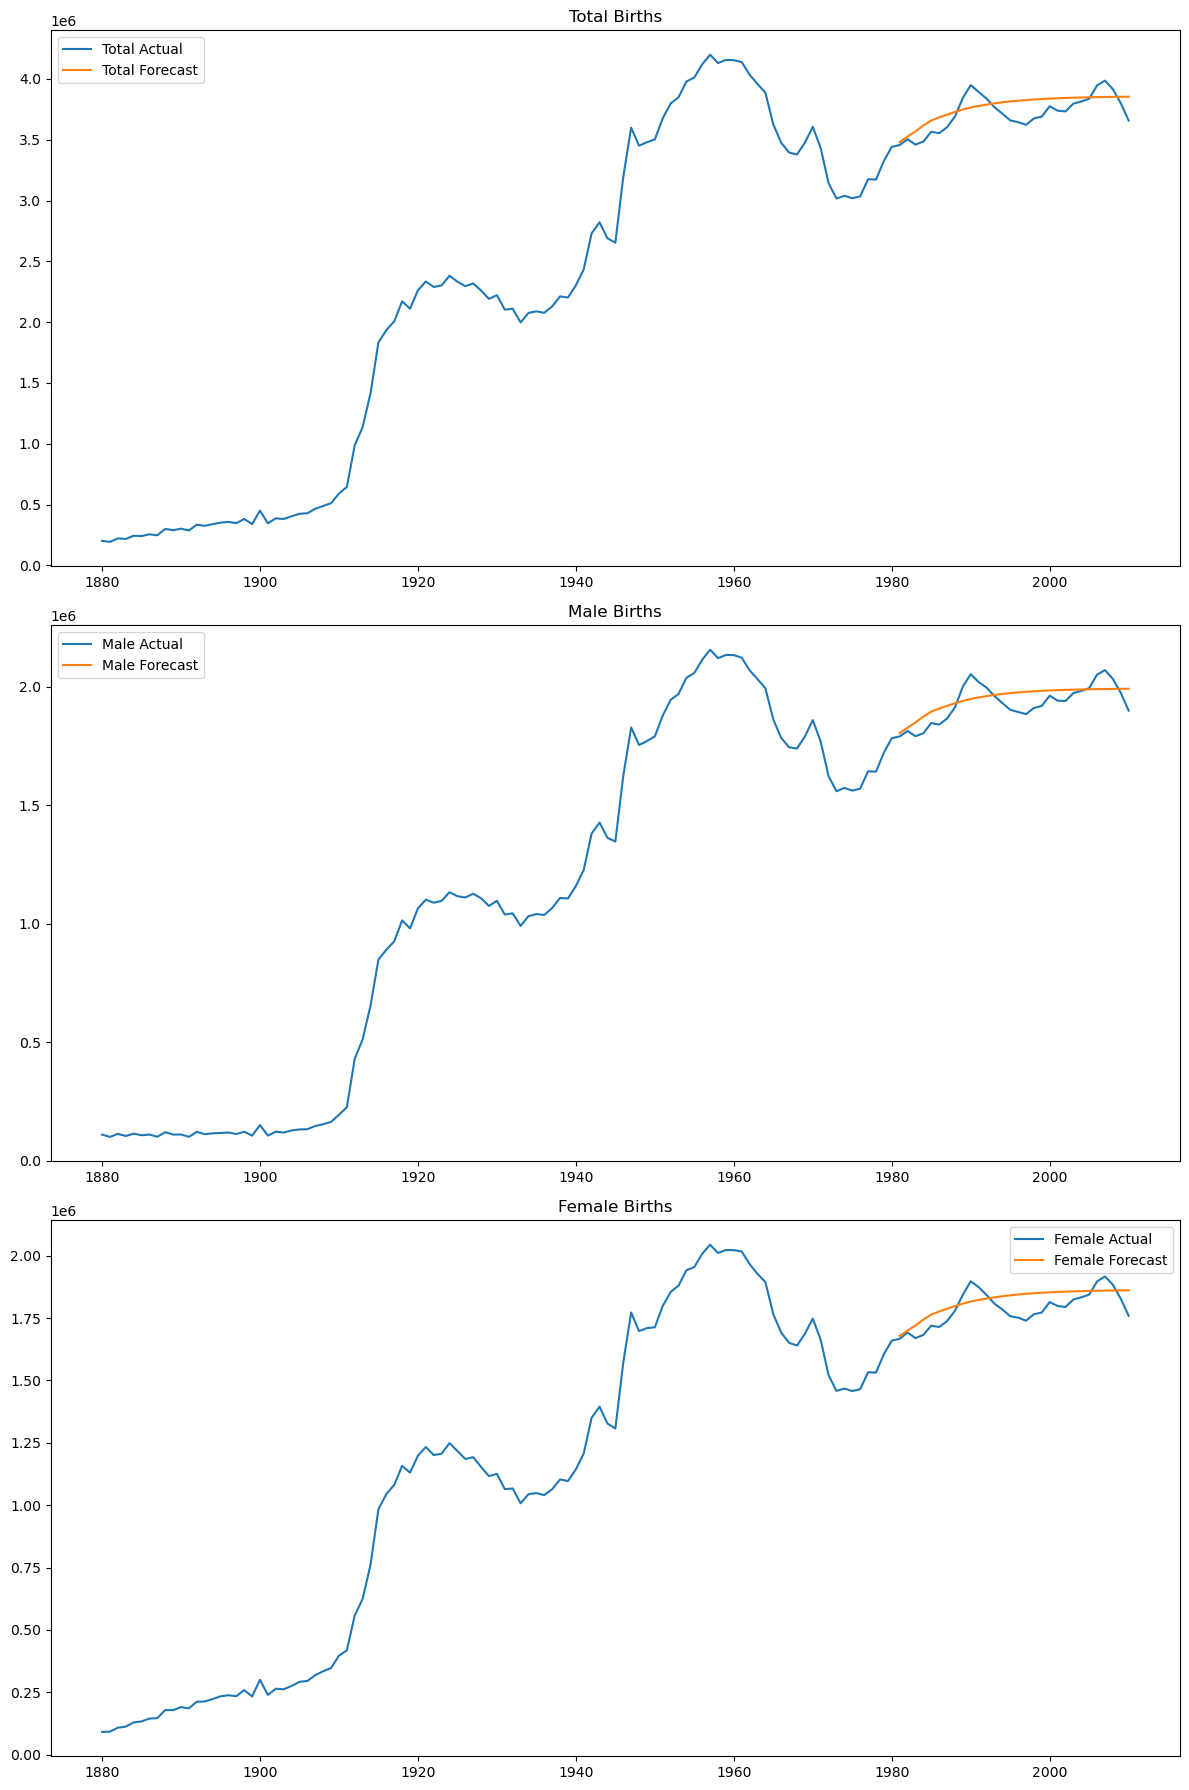

In [16]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 创建一个新的图形
fig, ax = plt.subplots(3, 1, figsize=(12,18))

# 在第一个子图中绘制总出生人口的预测结果与真实值
ax[0].plot(total_births.index, total_births['total'], label='Total Actual')
ax[0].plot(pd.date_range(start='1981', end='2010', freq='AS'), forecast_total, label='Total Forecast')
ax[0].legend()
ax[0].set_title('Total Births')

# 在第二个子图中绘制男性出生人口的预测结果与真实值
ax[1].plot(total_births.index, total_births['M'], label='Male Actual')
ax[1].plot(pd.date_range(start='1981', end='2010', freq='AS'), forecast_male, label='Male Forecast')
ax[1].legend()
ax[1].set_title('Male Births')

# 在第三个子图中绘制女性出生人口的预测结果与真实值
ax[2].plot(total_births.index, total_births['F'], label='Female Actual')
ax[2].plot(pd.date_range(start='1981', end='2010', freq='AS'), forecast_female, label='Female Forecast')
ax[2].legend()
ax[2].set_title('Female Births')

# 显示图形
plt.tight_layout()
plt.show()


In [17]:
# 计算总出生人口的预测误差率
total_actual = total_births.loc[pd.date_range(start='1981', end='2010', freq='AS'), 'total']
total_error = abs((forecast_total.values - total_actual.values) / total_actual.values) * 100
print('Total Error Rate: ', total_error.mean())

# 计算男性出生人口的预测误差率
male_actual = total_births.loc[pd.date_range(start='1981', end='2010', freq='AS'), 'M']
male_error = abs((forecast_male.values - male_actual.values) / male_actual.values) * 100
print('Male Error Rate: ', male_error.mean())

# 计算女性出生人口的预测误差率
female_actual = total_births.loc[pd.date_range(start='1981', end='2010', freq='AS'), 'F']
female_error = abs((forecast_female.values - female_actual.values) / female_actual.values) * 100
print('Female Error Rate: ', female_error.mean())

Total Error Rate:  2.66768202114045
Male Error Rate:  2.52970129769353
Female Error Rate:  2.798154913268582


In [18]:
# 计算总出生人口的预测误差率
total_actual = total_births.loc[pd.date_range(start='1981', end='2010', freq='AS'), 'total']
total_error = abs((forecast_total.values - total_actual.values) / total_actual.values) * 100
for year, error in zip(pd.date_range(start='1981', end='2010', freq='AS').year, total_error):
    print(f'Total Error Rate in {year}: {error}')

# 计算男性出生人口的预测误差率
male_actual = total_births.loc[pd.date_range(start='1981', end='2010', freq='AS'), 'M']
male_error = abs((forecast_male.values - male_actual.values) / male_actual.values) * 100
for year, error in zip(pd.date_range(start='1981', end='2010', freq='AS').year, male_error):
    print(f'Male Error Rate in {year}: {error}')

# 计算女性出生人口的预测误差率
female_actual = total_births.loc[pd.date_range(start='1981', end='2010', freq='AS'), 'F']
female_error = abs((forecast_female.values - female_actual.values) / female_actual.values) * 100
for year, error in zip(pd.date_range(start='1981', end='2010', freq='AS').year, female_error):
    print(f'Female Error Rate in {year}: {error}')

Total Error Rate in 1981: 0.711485037497872
Total Error Rate in 1982: 0.6211149348542297
Total Error Rate in 1983: 3.1237004715484322
Total Error Rate in 1984: 3.7870912828181864
Total Error Rate in 1985: 2.59496746609763
Total Error Rate in 1986: 3.6657426568921765
Total Error Rate in 1987: 2.875486883182745
Total Error Rate in 1988: 1.005581751478898
Total Error Rate in 1989: 2.4633470089072613
Total Error Rate in 1990: 4.669979641630336
Total Error Rate in 1991: 2.9629404963021044
Total Error Rate in 1992: 1.295042635739912
Total Error Rate in 1993: 0.835040018243658
Total Error Rate in 1994: 2.5041858847098553
Total Error Rate in 1995: 4.258106451729998
Total Error Rate in 1996: 4.853393294914488
Total Error Rate in 1997: 5.619991820135399
Total Error Rate in 1998: 4.246207680930617
Total Error Rate in 1999: 3.9203047604945516
Total Error Rate in 2000: 1.6623841482334818
Total Error Rate in 2001: 2.7409924932324436
Total Error Rate in 2002: 2.9571404611030907
Total Error Rate in 20

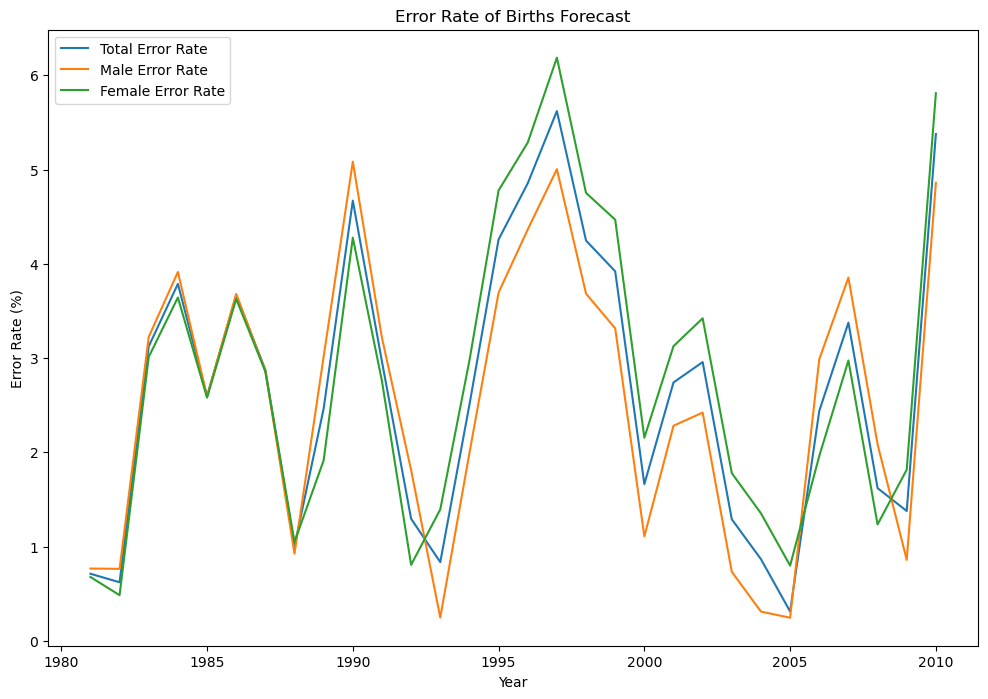

In [19]:
import matplotlib.pyplot as plt

# 创建一个新的figure
plt.figure(figsize=(12,8))

# 绘制总出生人口的预测误差率
plt.plot(pd.date_range(start='1981', end='2010', freq='AS').year, total_error, label='Total Error Rate')

# 绘制男性出生人口的预测误差率
plt.plot(pd.date_range(start='1981', end='2010', freq='AS').year, male_error, label='Male Error Rate')

# 绘制女性出生人口的预测误差率
plt.plot(pd.date_range(start='1981', end='2010', freq='AS').year, female_error, label='Female Error Rate')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Error Rate of Births Forecast')
plt.xlabel('Year')
plt.ylabel('Error Rate (%)')

# 显示图形
plt.show()
